# Sentiment Analysis Tutorial

* Quantifying users content, idea, belief, and opinion is known as sentiment analysis <br>
* Sentiment analysis helps in understanding people in a better and more accurate way <br>
* User's online post, blogs, tweets, feedback of product helps organisations to analyse their audience and innovate in products and services <br>

#### There are mainly two approaches for performing sentiment analysis : <br>
* Lexicon-based: Count number of positive and negative words in a given text and the larger count will be the sentiment of text <br>
* Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral responses <br>

#### We are going to analyse positive and negative sentiments in movie reviews from the NLTK library Movie Reviews dataset. It has 1000 positive and 1000 negative reviews

In [1]:
import nltk

* Import the movie review dataset from NLTK

In [2]:
from nltk.corpus import movie_reviews

The folder 'movie_reviews' has two separate folders : One for positive reviews (pos) and the other is for negative reviews(neg)

* Get all the filenames (both positive and negative) using the 'fileids' and then iterate over each review file and get its text into a List. <br>
* We have two Lists-one for positive review and one for negative review where each element corressponds to one particular review from the NLTK 'movie_reviews' corpora

In [3]:
file_ids = movie_reviews.fileids()
neg_rev = []
pos_rev = []

for file in file_ids[:1000]:
    rev=str(movie_reviews.raw(file))
    neg_rev.append(rev)
    
for file in file_ids[1000:]:
    rev=str(movie_reviews.raw(file))
    pos_rev.append(rev)

In [4]:
print(len(pos_rev))
print(len(neg_rev)) 

1000
1000


* At this point the 'pos_rev' array has positive reviews and 'neg_rev' has the negative reviews. We have 1000 reviews of each type.

* Let's check the first positive review

In [5]:
print(pos_rev[0])

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

* Let's check the first negative review

In [6]:
print(neg_rev[0])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

* Create the corressponding Lists to store the labels or the "Sentiment" of the review

In [7]:
pos_label=[]
neg_label=[]
i=0
for i in range(len(pos_rev)):
    pos_label.append("Positive")
i=0
for i in range(len(neg_rev)):
    neg_label.append("Negative") 

* To better analyse the data, convert the Lists to Pandas DataFrames; one for each class of review

In [8]:
import pandas as pd

In [9]:
i=0
index=[]
for i in range(1000):
    index.append(i)
pos_df=pd.DataFrame(index=index,columns=['Review','Sentiment'])
neg_df=pd.DataFrame(index=index,columns=['Review','Sentiment'])

In [10]:
i=0
for i in range(1000):
    rev=pos_rev[i]
    pos_df.loc[i,'Review']=rev
    pos_df.loc[i,'Sentiment']=pos_label[i]
    
j=0   
for j in range(1000):
    rev=neg_rev[j]
    neg_df.loc[j,'Review']=rev
    neg_df.loc[j,'Sentiment']=neg_label[j]

* DataFrame of first 5 positive reviews

In [11]:
pos_df.iloc[0]

Review       films adapted from comic books have had plenty...
Sentiment                                             Positive
Name: 0, dtype: object

* DataFrame of first 5 negative reviews

In [12]:
neg_df.head(5)

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",Negative
1,the happy bastard's quick movie review \ndamn ...,Negative
2,it is movies like these that make a jaded movi...,Negative
3,""" quest for camelot "" is warner bros . ' firs...",Negative
4,synopsis : a mentally unstable man undergoing ...,Negative


* To visualize the words in the positive and negative reviews we can use the Wordcloud module

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [14]:
from wordcloud import WordCloud

* Generate a word cloud image for positive reviews

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [16]:
print(stop_words)

{"aren't", 'again', "shouldn't", "you've", 'd', 'what', 'most', 'didn', 'their', 'yourselves', 'shan', 'don', 'myself', 'further', 'why', 'off', 'was', 'now', 'before', 'as', "mightn't", 'an', 'with', 'should', 'had', 'hers', 'weren', 't', "you'd", 'yourself', 'if', 'through', 'she', 'which', 'this', 'between', 'only', 'about', 'during', 'our', 'same', 'ours', 'nor', 'yours', 'or', 'of', 'by', 'once', 'than', 'very', "hasn't", 'haven', 'in', 'wouldn', "you'll", "doesn't", 'at', 's', 'doesn', 'too', 'herself', "don't", 'be', 'did', 'shouldn', 'have', 'can', 'you', 'a', 'over', "mustn't", 'out', 'himself', "hadn't", 'the', 'having', 'under', "shan't", 'been', 'has', 'not', 'and', 'hasn', 'him', 'doing', 'being', 'more', 'but', 'how', 'any', "couldn't", 'on', 'her', 'ourselves', "it's", 'are', 'then', 'aren', 'y', 'my', 'for', 'both', 'until', "wasn't", 'here', 'do', 'against', 'themselves', 'where', 'we', 'mustn', 'so', 'will', 'no', 'mightn', 'above', 'll', 'to', 'up', "needn't", 've', 

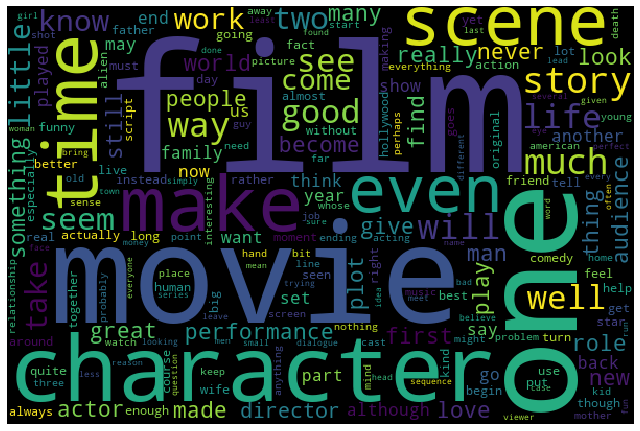

In [17]:
pos_str=''
for string in pos_df['Review']:
    if(string not in stop_words):
        pos_str=pos_str+string+' '
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(pos_str)
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

* Generate a word cloud image for positive reviews

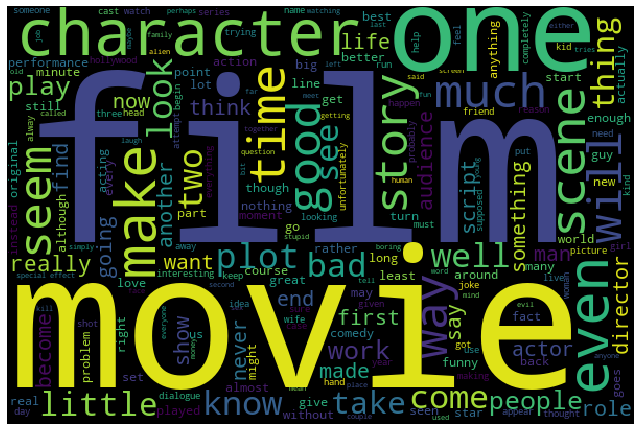

In [18]:
neg_str=''
for string in neg_df['Review']:
    if(string not in stop_words):
        neg_str=neg_str+string+' '
polarity_neg_wordcloud = WordCloud(width=600, height=400).generate(neg_str)
plt.figure( figsize=(9,9))
plt.imshow(polarity_neg_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show() 

* Combine the positive and negative review DataFrames into a single Dataframe 

In [19]:
df = pd.concat([pos_df,neg_df],ignore_index=True)

In [20]:
df.shape

(2000, 2)

In [21]:
df.head()

,Review,Sentiment
0,films adapted from comic books have had plenty...,Positive
1,every now and then a movie comes along from a ...,Positive
2,you've got mail works alot better than it dese...,Positive
3,""" jaws "" is a rare film that grabs your atten...",Positive
4,moviemaking is a lot like being the general ma...,Positive


In [22]:
df.tail()

,Review,Sentiment
1995,"if anything , "" stigmata "" should be taken as ...",Negative
1996,"john boorman's "" zardoz "" is a goofy cinematic...",Negative
1997,the kids in the hall are an acquired taste . \...,Negative
1998,there was a time when john carpenter was a gre...,Negative
1999,two party guys bob their heads to haddaway's d...,Negative


* For Text Normalization - Use Lemmatization to reduce words to their base word, which is linguistically correct lemmas.

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,sent_tokenize

In [24]:
''' 
Need to work on this part.


lemmatizer = WordNetLemmatizer()

for s in df['Review']:
    tokens = word_tokenize(s)
    temp = set()
    for token in tokens:
        stem_token = lemmatizer.lemmatize(token)
        temp.add(stem_token)
    temp_str = " ".join(temp)
    df.loc[i,"Review"] = temp_str
    i = i+1
'''

' \nNeed to work on this part.\n\n\nlemmatizer = WordNetLemmatizer()\n\nfor s in df[\'Review\']:\n    tokens = word_tokenize(s)\n    temp = set()\n    for token in tokens:\n        stem_token = lemmatizer.lemmatize(token)\n        temp.add(stem_token)\n    temp_str = " ".join(temp)\n    df.loc[i,"Review"] = temp_str\n    i = i+1\n'

## Extracting the Features and Creating the Document Term Matrix (DTM)

* We create the features from our reviews that can be fed to a machine learning model <br>
* We can use Tfidf Vectorizer which marks the TF-IDF ie (Term Frequency Inverse Document Frequency) for each of the word (or feature) in every document.

* This is known as the Document Term Matrix (DTM) (represented by dtm_df DataFrame) <br>
* Every row corressponds to one document which in our case is one review and every column is a unique feature (or word)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [26]:
vect = TfidfVectorizer(stop_words=stop_words)
X = vect.fit_transform(df['Review'])
y = df['Sentiment']

* Let's see the extracted features via a word cloud

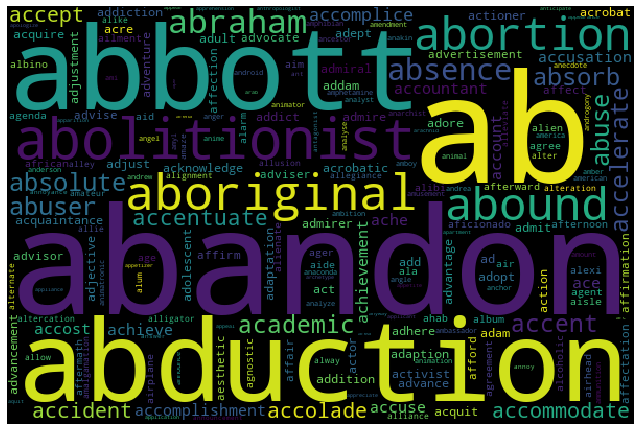

In [27]:
feature_list=vect.get_feature_names()
features=""
for feature in feature_list:
    features=features+feature+" "
wordcloud = WordCloud(width=600, height=400).generate(features)
plt.figure( figsize=(9,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

* Create the Document Term Matrix (DTM) dataframe from the features

In [28]:
import sklearn

In [29]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

In [30]:
dtm_df=pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [31]:
dtm_df.head()

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0.061917,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.023844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
le=LabelEncoder()

In [33]:
dtm_df['Sentiment']=le.fit_transform(df['Sentiment'])

In [34]:
dtm_df.head()

,00,000,0009f,007,00s,03,04,05,05425,10,...,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz,Sentiment
0,0.061917,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.023844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


* Create Training & Validation Sets

In [35]:
from sklearn.model_selection import train_test_split,cross_validate

In [36]:
X_train,X_test,y_train,y_test=train_test_split(dtm_df.drop(['Sentiment'],axis=1),dtm_df['Sentiment'],test_size=0.20,random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 39516)
(400, 39516)
(1600,)
(400,)


## Modelling Algorithms

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

* Import evaluation libraries

In [39]:
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report

In [40]:
import mlxtend

In [41]:
from mlxtend.plotting import plot_confusion_matrix

In [42]:
clf_lr=LogisticRegression()
clf_lr.fit(X_train,y_train)
lr_pred=clf_lr.predict(X_test)
print("The accuracy of Logistic Regression :" , accuracy_score(lr_pred,y_test)) 
print("The classification report is : \n"+classification_report(lr_pred,y_test))

The accuracy of Logistic Regression : 0.8225
The classification report is : 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       196
           1       0.83      0.81      0.82       204

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



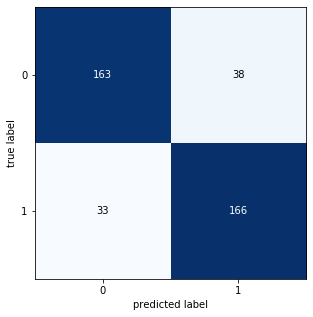

In [43]:
from sklearn.metrics import confusion_matrix
conf_mat_lr = confusion_matrix(y_test, lr_pred)
fig_lr, ax_lr = plot_confusion_matrix(conf_mat=conf_mat_lr,figsize=(5,5))
plt.show()

### Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [45]:
clf_gnb=GaussianNB()
clf_gnb.fit(X_train,y_train)
gnb_pred=clf_gnb.predict(X_test)
print("The accuracy of Gaussian Naive Bayes :" , accuracy_score(gnb_pred,y_test)) 
print("The classification report is : \n"+classification_report(gnb_pred,y_test))

The accuracy of Gaussian Naive Bayes : 0.615
The classification report is : 
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       175
           1       0.68      0.60      0.64       225

    accuracy                           0.61       400
   macro avg       0.62      0.62      0.61       400
weighted avg       0.62      0.61      0.62       400



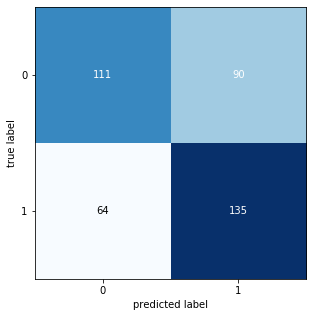

In [46]:
conf_mat_gnb = confusion_matrix(y_test, gnb_pred)
fig_gnb, ax_gnb = plot_confusion_matrix(conf_mat=conf_mat_gnb, figsize=(5, 5))
plt.show()

### Multinomial Naive Bayes

In [47]:
clf_mnb=MultinomialNB()
clf_mnb.fit(X_train,y_train)
mnb_pred=clf_mnb.predict(X_test)
print("The accuracy of Multinomial Naive Bayes :" , accuracy_score(mnb_pred,y_test)) 
print("The classification report is : \n"+classification_report(mnb_pred,y_test))

The accuracy of Multinomial Naive Bayes : 0.8125
The classification report is : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       202
           1       0.81      0.81      0.81       198

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



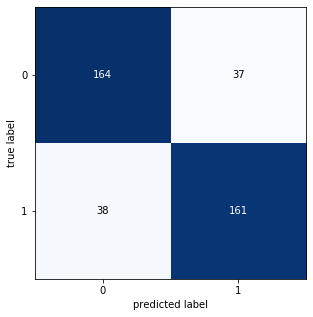

In [48]:
conf_mat_mnb = confusion_matrix(y_test, mnb_pred)
fig_mnb, ax_mnb = plot_confusion_matrix(conf_mat=conf_mat_mnb,figsize=(5, 5))
plt.show()